In [12]:
"""To extract features of a face from trained network"""

import torch
from torch.autograd import Variable
import torch.functional as F
import dataLoader
import argparse
import torch.optim as optim
import torchvision.utils as vutils
from torch.utils.data import DataLoader
import faceNet
import torch.nn as nn
import os
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt 

# do not change seed value
np.random.seed(11)
torch.random.manual_seed(11)

In [2]:
batch_size = 10
m = 4
model = "checkpoint/netFinal_8.pth"
imWidth = 96
imHeight = 112
imageRoot = "/datasets/cse152-252-sp20-public/hw2_data/CASIA-WebFace/"
alignmentRoot = "./data/casia_landmark.txt"

In [4]:
# Initialize dataLoader
faceDataset = dataLoader.BatchLoader(
        imageRoot = imageRoot,
        alignmentRoot = alignmentRoot,
        cropSize = (imWidth, imHeight ),
        shuffle = False)
faceLoader = DataLoader(faceDataset, batch_size = batch_size, num_workers = 16, shuffle = False )


In [6]:
net = faceNet.faceNet(m = m, feature = True )
net.load_state_dict(torch.load(model) )
net.cuda()
net.eval()

for i, dataBatch in enumerate(faceLoader):
    # Read data
    image_cpu = dataBatch['img']
    imBatch = Variable(image_cpu )
    imBatch = imBatch.cuda()
    feature = net(imBatch)
    break
feature = feature.detach().cpu().numpy()
print(feature[:3,:3])
feature /= np.linalg.norm(feature, axis = 1).reshape((10,1))
# print(np.sum(feature**2, axis = 1))

# feature.


/home/sgaba/face_recognition/sphereFace/matlab_cp2tform.py:85: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  r, _, _, _ = lstsq(X, U)
/home/sgaba/face_recognition/sphereFace/matlab_cp2tform.py:85: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  r, _, _, _ = lstsq(X, U)
/home/sgaba/face_recognition/sphereFace/matlab_cp2tform.py:85: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this wa

[[ 2.6386573   1.6819938  -0.40619707]
 [ 1.8768724  -2.5056872  -2.2107666 ]
 [ 0.3411923  -5.725858   -0.19994393]]


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  del sys.path[0]


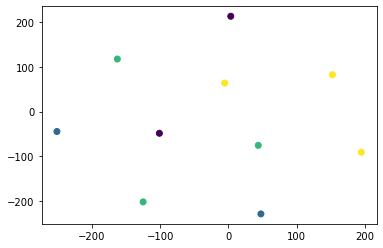

In [22]:
feature_embedded = TSNE(n_components=2).fit_transform(feature)

n_samples = feature_embedded.shape[0]
x = np.linspace(0, 1, int(np.sqrt(n_samples))+1)
xx, yy = np.meshgrid(x, x)
X = np.hstack([
    xx.ravel().reshape(-1, 1),
    yy.ravel().reshape(-1, 1),
])
color = xx.ravel()
color = color[:n_samples]
plt.plot(figsize=(15, 8))
ax = plt.subplot(111)
ax.scatter(feature_embedded[:, 0], feature_embedded[:, 1], c=color)